# Student Performance Prediction

The science of training machines to learn from data and make future predictions has become essential in modern decision-making systems. Education plays a critical role in shaping economic growth and social development. With increasing academic pressure and diverse learning environments, understanding student performance has become central to improving educational outcomes and reducing dropout rates.

Student performance prediction is an important problem in the education domain. Academic success depends on several factors such as study time, attendance, family background, parental education, access to resources, and lifestyle habits. Accurate analysis of historical student data helps institutions identify students at academic risk and take timely corrective measures.

In this project, Machine Learning techniques are applied to predict whether a student will pass or fail based on academic, personal, and social attributes. The prediction task is treated as a binary classification problem, where the model learns patterns from historical student data and generalizes them to unseen cases.

# Dataset Description

The dataset used in this project is the Student Performance Dataset obtained from the UCI Machine Learning Repository.

In [25]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/student_data.csv", sep=';')
df.shape


(395, 33)

In [50]:
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


# Data Cleaning
To convert the problem into a classification task, a new column called pass is created.
Students with final grade ≥ 10 are marked as Pass (1) and others as Fail (0).

In [27]:
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)


In [ ]:
data.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)


To convert the problem into a classification task, a new column called pass is created.
Students with final grade ≥ 10 are marked as Pass (1) and others as Fail (0).

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])


In [29]:
# Dataset already integrated
df.shape

(395, 34)

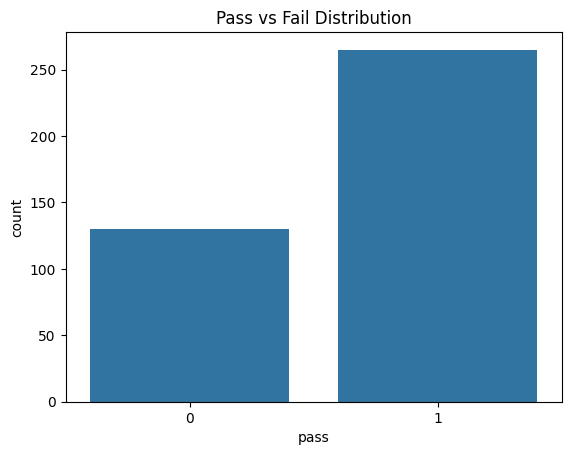

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='pass', data=df)
plt.title("Pass vs Fail Distribution")
plt.show()


A count plot is used to visualize how many students passed and failed.
This helps in understanding class imbalance.

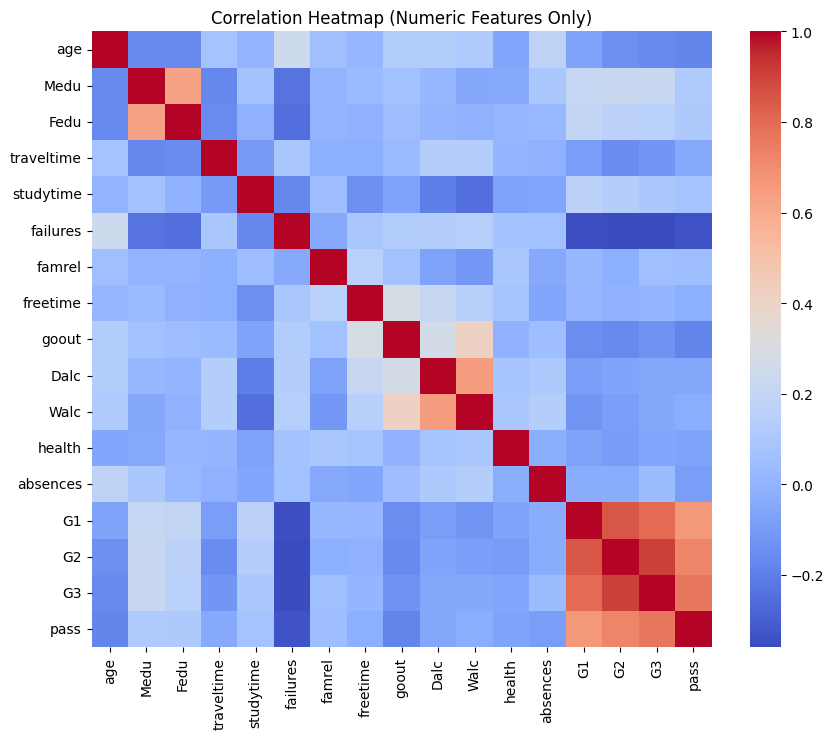

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



In [33]:
X = df.drop('pass', axis=1)
y = df['pass']


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)



Logistic Regression is used as a baseline model for binary classification.

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=300,
                       random_state=42)

In [47]:
X_train.dtypes


,0
school,int64
sex,int64
age,int64
address,int64
famsize,int64
Pstatus,int64
Medu,int64
Fedu,int64
Mjob,int64
Fjob,int64


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)



In [35]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred
}

for name, pred in models.items():
    print(name)
    print("Accuracy:", accuracy_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred))
    print("-"*30)



Logistic Regression
Accuracy: 0.6582278481012658
F1 Score: 0.7476635514018691
------------------------------
Random Forest
Accuracy: 0.7088607594936709
F1 Score: 0.8034188034188035
------------------------------
Gradient Boosting
Accuracy: 0.620253164556962
F1 Score: 0.7272727272727273
------------------------------


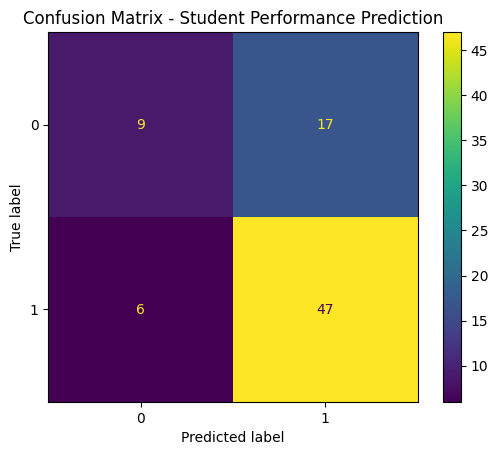

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Confusion Matrix - Student Performance Prediction")
plt.show()



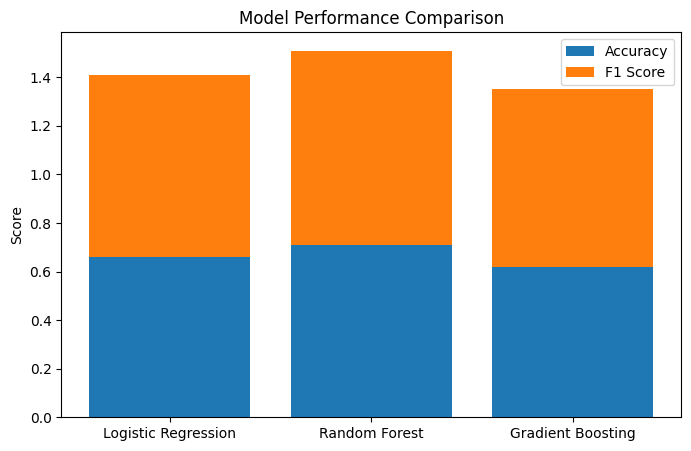

In [53]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.66, 0.71, 0.62]   # nee results
f1_score = [0.75, 0.80, 0.73]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy, label='Accuracy')
plt.bar(models, f1_score, bottom=accuracy, label='F1 Score')
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


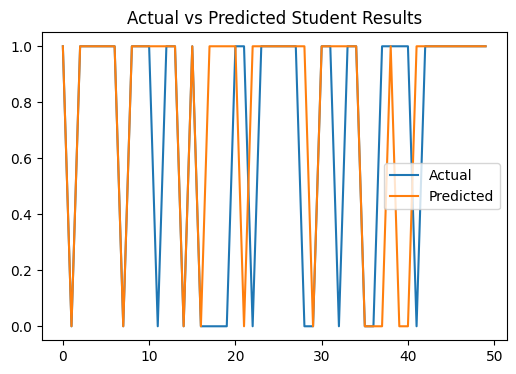

In [54]:
plt.figure(figsize=(6,4))
plt.plot(y_test.values[:50], label="Actual")
plt.plot(rf_pred[:50], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Student Results")
plt.show()
